<a href="https://colab.research.google.com/github/221066/MPA-MLF/blob/main/MiniProject/finall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

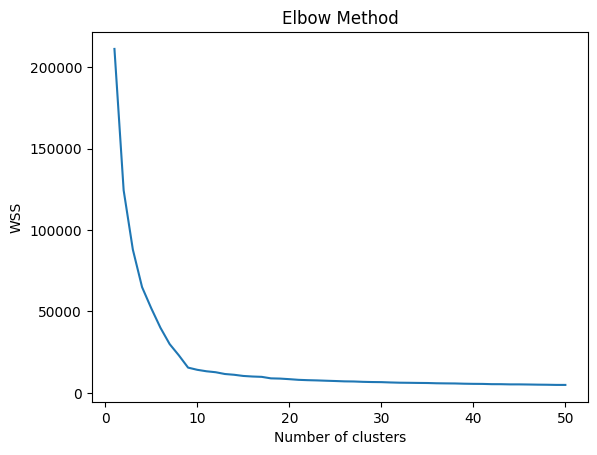

Number of determined transmitters = 9


In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from kneed import KneeLocator

from google.colab import drive
drive.mount('/content/drive')

# Read the dataset
data = pd.read_csv('/content/drive/MyDrive/Data/Data_prepared_final.csv')

#'data' is loaded dataset with shape (19200, 9)
# Step 1: Data Preprocessing
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# Step 2: Choosing the Number of Clusters
# Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different cluster counts
wss = []
for i in range(1, 51):  # Test for 1 to 51 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(normalized_data)
    wss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 51), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

# Find the elbow point using the KneeLocator package
kl = KneeLocator(range(1, len(wss) + 1), wss, S=1.0, curve='convex', direction='decreasing')
print("Number of determined transmitters =", kl.elbow)